In [199]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras
import os

In [200]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [201]:
# Save esg scores
file_to_load = os.path.join("Resources", "latest_esg_scores.csv")
esg_scores = pd.read_csv(file_to_load)

# Save full_esg
file_to_load = os.path.join("Resources", "latest_esg_details.csv")
esg_data = pd.read_csv(file_to_load)

# Save full_info
file_to_load = os.path.join("Resources", "latest_stocks_details.csv")
info_df = pd.read_csv(file_to_load)

# Save stocks historical data
file_to_load = os.path.join("Resources", "latest_stocks_historical_data.csv")
stock_df = pd.read_csv(file_to_load)

In [204]:
# Got the closing price for all stocks
def create_df(df, index, column, value):
    stocks_df = df.copy()
    stocks_df = stocks_df.pivot(index=index, columns=column, values=value)
    stocks_df = stocks_df.reset_index()
    stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
    stocks_df = stocks_df.sort_values(by = ['Date'])
    return stocks_df

In [220]:
# Get price of stocks, sorted by date
stock_price_df = create_df(stock_df, 'Date', 'TICKER', 'Close')
stock_price_df

TICKER       Date        AAPL         ABT         ACN        ADBE        ADM  \
0      2018-03-16   44.505001   63.180000  160.889999  225.550003  43.500000   
1      2018-03-19   43.825001   62.259998  160.619995  222.179993  43.060001   
2      2018-03-20   43.810001   62.650002  162.880005  229.750000  42.970001   
3      2018-03-21   42.817501   62.419998  162.029999  226.850006  42.619999   
4      2018-03-22   42.212502   60.930000  150.229996  220.520004  41.939999   
...           ...         ...         ...         ...         ...        ...   
1002   2022-03-09  162.949997  118.389999  309.420013  450.869995  81.779999   
1003   2022-03-10  158.520004  117.000000  309.519989  438.950012  84.309998   
1004   2022-03-11  154.729996  114.019997  311.579987  416.380005  83.599998   
1005   2022-03-14  150.619995  115.519997  307.679993  411.500000  82.570000   
1006   2022-03-15  155.089996  117.480003  316.230011  421.660004  82.809998   

TICKER        AEP        AES        AKAM        AMAT  ...          T  \
0       67.809998  10.840000   74.019997   59.439999  ...  37.000000   
1       67.449997  10.770000   72.489998   58.500000  ...  36.580002   
2       67.449997  10.710000   73.680000   59.230000  ...  36.340000   
3       66.910004  10.800000   73.389999   60.779999  ...  36.000000   
4       67.360001  10.820000   71.650002   58.959999  ...  35.369999   
...           ...        ...         ...         ...  ...        ...   
1002    95.010002  21.959999  109.180000  128.619995  ...  23.260000   
1003    95.989998  22.350000  109.529999  124.970001  ...  23.190001   
1004    95.540001  22.200001  108.440002  123.639999  ...  23.190001   
1005    94.739998  21.719999  108.080002  120.129997  ...  22.889999   
1006    96.110001  22.340000  110.430000  124.410004  ...  23.090000   

TICKER          TT         UNH         UPS           V         VMW         VZ  \
0        69.418152  227.860001  110.910004  124.529999  124.470001  48.560001   
1        68.673393  225.050003  108.459999  123.209999  125.589996  48.310001   
2        69.014740  226.779999  108.029999  124.910004  126.160004  47.689999   
3        69.038017  222.820007  107.650002  123.220001  124.349998  47.279999   
4        66.780449  215.210007  104.449997  119.989998  122.099998  46.880001   
...            ...         ...         ...         ...         ...        ...   
1002    150.970001  485.570007  206.779999  199.759995  114.830002  53.080002   
1003    148.850006  491.440002  207.179993  197.970001  114.010002  53.230000   
1004    148.830002  482.869995  203.899994  196.710007  110.599998  53.040001   
1005    151.179993  487.920013  204.300003  200.330002  108.690002  52.500000   
1006    152.289993  497.910004  210.529999  206.139999  111.160004  52.759998   

TICKER        WDAY        WFC        XOM  
0       135.330002  55.900002  75.120003  
1       131.600006  55.480000  74.150002  
2       133.080002  54.900002  73.989998  
3       133.429993  54.790001  75.040001  
4       131.220001  52.529999  73.500000  
...            ...        ...        ...  
1002    233.529999  49.160000  82.790001  
1003    228.449997  49.009998  85.360001  
1004    224.910004  48.470001  84.919998  
1005    220.910004  49.860001  81.879997  
1006    221.419998  50.110001  77.220001  

[1007 rows x 90 columns]

In [221]:
# Get volume of stocks, sorted by date
stock_vol_df = create_df(stock_df, 'Date', 'TICKER', 'Volume')
stock_vol_df

TICKER       Date         AAPL         ABT        ACN       ADBE         ADM  \
0      2018-03-16  157618800.0  11840900.0  4018600.0  8783000.0  10091100.0   
1      2018-03-19  133787200.0   5286200.0  1890000.0  4029300.0   4270500.0   
2      2018-03-20   78597600.0   3943000.0  2249400.0  5019300.0   2133700.0   
3      2018-03-21  148219600.0   3478300.0  3452600.0  3971800.0   3078300.0   
4      2018-03-22  165963200.0   5345300.0  8203600.0  3008700.0   2645500.0   
...           ...          ...         ...        ...        ...         ...   
1002   2022-03-09   91454900.0   5004700.0  2825900.0  2905700.0   5769900.0   
1003   2022-03-10  105342000.0   4377600.0  2049000.0  2722300.0   3395900.0   
1004   2022-03-11   96836300.0   8012400.0  3811900.0  4433100.0   3016900.0   
1005   2022-03-14  108732100.0   5527500.0  3156600.0  3731400.0   3647200.0   
1006   2022-03-15   92964300.0   5041200.0  2695200.0  3201700.0   3693000.0   

TICKER        AEP        AES       AKAM        AMAT  ...           T  \
0       6399400.0  7325800.0  2620600.0  15070200.0  ...  37103000.0   
1       2595600.0  5646600.0  1324300.0  13747300.0  ...  19637900.0   
2       2496400.0  6359700.0  1288600.0   8527300.0  ...  20167100.0   
3       2805300.0  5687900.0   927100.0  17171400.0  ...  17437200.0   
4       3137500.0  7888900.0   848800.0  14876400.0  ...  28196900.0   
...           ...        ...        ...         ...  ...         ...   
1002    3006200.0  6540500.0  1729400.0   7623200.0  ...  43814900.0   
1003    2897900.0  3953100.0  1386000.0   5604400.0  ...  40500800.0   
1004    2254900.0  4679500.0  1242400.0   6013200.0  ...  54451800.0   
1005    2948400.0  5516900.0  1479000.0   6733200.0  ...  49609800.0   
1006    3673700.0  4247700.0  1522500.0   6875300.0  ...  35565900.0   

TICKER         TT        UNH        UPS           V        VMW          VZ  \
0       2991898.0  5690300.0  5679200.0   9447100.0  2160400.0  26838100.0   
1       1217847.0  3407300.0  3351200.0  17387800.0  1492500.0  12980800.0   
2       1450641.0  3429100.0  2513000.0   7779700.0  1349700.0  10765500.0   
3       1752782.0  3419800.0  2805100.0   7359500.0  1125200.0  11062500.0   
4       1643475.0  5894800.0  4150000.0  10501500.0   895200.0  14270800.0   
...           ...        ...        ...         ...        ...         ...   
1002    2189900.0  3115500.0  3097600.0   8457600.0  1834000.0  23049800.0   
1003    1092400.0  2834800.0  2284100.0   7061600.0  1056600.0  17501800.0   
1004    1208000.0  2615000.0  2006200.0   5431600.0  1375800.0  20834600.0   
1005    2352000.0  2704100.0  2237200.0   7994700.0  1853500.0  23124100.0   
1006    1443800.0  3043000.0  2865400.0   8277700.0  1662000.0  20477600.0   

TICKER       WDAY         WFC         XOM  
0       1704400.0  37095000.0  32109700.0  
1       2529300.0  17982200.0  12744800.0  
2       1500100.0  26874600.0  13003200.0  
3       1077200.0  18997300.0  15418500.0  
4       1045000.0  32656300.0  17737000.0  
...           ...         ...         ...  
1002    2392000.0  34560200.0  65466700.0  
1003    1479000.0  26178800.0  44644200.0  
1004    1789000.0  23695900.0  35284300.0  
1005    1827700.0  28166600.0  37462600.0  
1006    2180400.0  25080600.0  47957900.0  

[1007 rows x 90 columns]

In [222]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

TICKER
Date    0
AAPL    0
ABT     0
ACN     0
ADBE    0
       ..
VMW     0
VZ      0
WDAY    0
WFC     0
XOM     0
Length: 90, dtype: int64

In [223]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

TICKER
Date    0
AAPL    0
ABT     0
ACN     0
ADBE    0
       ..
VMW     0
VZ      0
WDAY    0
WFC     0
XOM     0
Length: 90, dtype: int64

In [224]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1006
Data columns (total 90 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1007 non-null   datetime64[ns]
 1   AAPL    1007 non-null   float64       
 2   ABT     1007 non-null   float64       
 3   ACN     1007 non-null   float64       
 4   ADBE    1007 non-null   float64       
 5   ADM     1007 non-null   float64       
 6   AEP     1007 non-null   float64       
 7   AES     1007 non-null   float64       
 8   AKAM    1007 non-null   float64       
 9   AMAT    1007 non-null   float64       
 10  AMGN    1007 non-null   float64       
 11  ANTM    1007 non-null   float64       
 12  AXP     1007 non-null   float64       
 13  BAC     1007 non-null   float64       
 14  BBY     1007 non-null   float64       
 15  BDX     1007 non-null   float64       
 16  BIIB    1007 non-null   float64       
 17  BLK     1007 non-null   float64       
 18  BSX     

In [106]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1006
Data columns (total 90 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1007 non-null   datetime64[ns]
 1   AAPL    1007 non-null   float64       
 2   ABT     1007 non-null   float64       
 3   ACN     1007 non-null   float64       
 4   ADBE    1007 non-null   float64       
 5   ADM     1007 non-null   float64       
 6   AEP     1007 non-null   float64       
 7   AES     1007 non-null   float64       
 8   AKAM    1007 non-null   float64       
 9   AMAT    1007 non-null   float64       
 10  AMGN    1007 non-null   float64       
 11  ANTM    1007 non-null   float64       
 12  AXP     1007 non-null   float64       
 13  BAC     1007 non-null   float64       
 14  BBY     1007 non-null   float64       
 15  BDX     1007 non-null   float64       
 16  BIIB    1007 non-null   float64       
 17  BLK     1007 non-null   float64       
 18  BSX     

In [225]:
# Statistical desctiption of stocks volume
stock_vol_df.describe()

TICKER          AAPL           ABT           ACN          ADBE           ADM  \
count   1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03   
mean    1.212976e+08  5.840448e+06  2.139810e+06  2.902185e+06  3.132424e+06   
std     5.689916e+07  3.110829e+06  9.318082e+05  1.424880e+06  1.362099e+06   
min     4.100000e+07  1.067700e+06  5.281000e+05  5.892000e+05  4.116000e+05   
25%     8.358420e+07  4.105850e+06  1.567750e+06  1.968400e+06  2.242350e+06   
50%     1.064352e+08  5.130300e+06  1.932600e+06  2.566200e+06  2.780800e+06   
75%     1.426222e+08  6.568200e+06  2.395450e+06  3.483850e+06  3.661050e+06   
max     4.265100e+08  4.754020e+07  8.561500e+06  1.218940e+07  1.136810e+07   

TICKER           AEP           AES          AKAM          AMAT          AMGN  \
count   1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03   
mean    2.809215e+06  5.869969e+06  1.620788e+06  9.422596e+06  2.827744e+06   
std     1.300774e+06  2.316542e+06  9.768039e+05  4.411325e+06  1.292352e+06   
min     4.401000e+05  9.862000e+05  2.774000e+05  1.409200e+06  6.128000e+05   
25%     2.083450e+06  4.219500e+06  1.030750e+06  6.432100e+06  2.086100e+06   
50%     2.532000e+06  5.518400e+06  1.387100e+06  8.413900e+06  2.548900e+06   
75%     3.211800e+06  7.041050e+06  1.913950e+06  1.128855e+07  3.184000e+06   
max     2.245570e+07  2.101100e+07  1.077170e+07  5.258420e+07  1.687840e+07   

TICKER  ...             T            TT           UNH           UPS  \
count   ...  1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03   
mean    ...  3.883083e+07  1.631779e+06  3.641170e+06  3.459490e+06   
std     ...  1.982001e+07  7.874797e+05  2.071274e+06  1.998522e+06   
min     ...  8.697200e+06  2.920000e+05  7.140000e+05  8.359000e+05   
25%     ...  2.708660e+07  1.111600e+06  2.516100e+06  2.372300e+06   
50%     ...  3.381840e+07  1.456828e+06  3.094300e+06  2.943100e+06   
75%     ...  4.431680e+07  1.924598e+06  4.162050e+06  3.925850e+06   
max     ...  2.470524e+08  7.495100e+06  2.736140e+07  3.097090e+07   

TICKER             V           VMW            VZ          WDAY           WFC  \
count   1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03   
mean    8.730933e+06  1.485504e+06  1.628516e+07  1.960789e+06  2.851028e+07   
std     3.827255e+06  9.169056e+05  6.758625e+06  1.157934e+06  1.464035e+07   
min     2.420900e+06  3.461000e+05  5.763700e+06  3.691000e+05  4.635500e+06   
25%     6.206650e+06  9.216500e+05  1.190225e+07  1.273600e+06  1.819330e+07   
50%     7.812900e+06  1.245200e+06  1.482170e+07  1.692100e+06  2.386540e+07   
75%     1.010425e+07  1.767650e+06  1.863140e+07  2.247500e+06  3.493305e+07   
max     3.837960e+07  1.109900e+07  5.540630e+07  1.227460e+07  1.189526e+08   

TICKER           XOM  
count   1.007000e+03  
mean    2.050849e+07  
std     1.154874e+07  
min     3.979400e+06  
25%     1.202245e+07  
50%     1.775820e+07  
75%     2.629960e+07  
max     8.443940e+07  

[8 rows x 89 columns]

In [226]:
# Statistical desctiption of stocks price
stock_price_df.describe()

TICKER         AAPL          ABT          ACN         ADBE          ADM  \
count   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000   
mean      90.187187    93.883148   224.918997   387.444648    49.420983   
std       43.161803    22.392827    67.350804   134.266875    10.458563   
min       35.547501    57.570000   133.669998   205.160004    29.309999   
25%       50.671249    75.789997   168.635002   266.919998    42.240002   
50%       74.702499    88.300003   201.589996   347.799988    46.000000   
75%      128.464996   116.570000   265.615005   489.354996    57.485001   
max      182.009995   141.460007   415.420013   688.369995    84.309998   

TICKER          AEP          AES         AKAM         AMAT         AMGN  ...  \
count   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  ...   
mean      83.281897    18.675213    93.056197    75.646117   213.830646  ...   
std        8.160328     4.783247    16.922851    39.463232    24.585995  ...   
min       62.930000     9.560000    57.700001    28.990000   166.050003  ...   
25%       78.779999    14.765000    76.824997    45.934999   193.009995  ...   
50%       84.139999    17.670000    95.309998    57.860001   215.110001  ...   
75%       89.334999    23.320000   109.000000   118.424999   234.985001  ...   
max      104.330002    28.910000   120.440002   167.000000   260.950012  ...   

TICKER            T           TT          UNH          UPS            V  \
count   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000   
mean      30.949176   117.872135   313.055313   140.926971   183.698610   
std        3.796162    42.894651    76.991150    40.815800    34.057273   
min       22.170000    62.366177   194.860001    86.169998   116.989998   
25%       28.735000    81.389336   250.695000   108.520000   151.930000   
50%       30.440001   100.108612   288.239990   118.610001   187.080002   
75%       32.669998   153.445000   362.720001   172.709999   211.025002   
max       39.630001   206.559998   505.579987   232.110001   250.929993   

TICKER          VMW           VZ         WDAY          WFC          XOM  
count   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  
mean     148.497348    55.938133   196.004310    44.170050    63.776465  
std       18.045683     3.368892    46.160716    10.519539    14.956490  
min       93.010002    46.290001   113.870003    21.139999    31.450001  
25%      139.085007    54.055000   159.735001    38.125000    53.825001  
50%      148.979996    56.459999   191.600006    47.560001    67.580002  
75%      157.014999    58.424999   232.129997    52.055000    76.949997  
max      205.520004    62.070000   300.899994    59.189999    87.779999  

[8 rows x 89 columns]

In [227]:
# Function to normalize stock prices based on their initial price
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [279]:
# Function to plot interactive plots using Plotly Express
def create_plot(df, title, name = ''):
    title = name +  ' ' + title
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
        
    fig.update_layout(
    width=1000,
    height=500
    )
    fig.show()

In [229]:
# Top 10 esg companies
top_esg = esg_scores.nlargest(n=10, columns=['Total-Score'])
top_esg

TICKER  Total-Score  E-Score  S-Score  G-Score  Last Rated
79    XOM         37.9     19.2     10.5      8.1  2022-02-01
55    ADM         36.4     18.2     13.2      5.0  2022-02-01
71    AES         35.0     20.8      8.3      5.9  2022-02-01
23    WFC         32.8      1.9     15.4     15.5  2022-02-01
28     GM         30.9     10.3     12.9      7.7  2022-02-01
29    AEP         30.5     17.8      7.2      5.6  2022-02-01
57    ETR         30.3     16.2      7.4      6.6  2022-02-01
18      F         29.6      9.3     11.3      9.0  2022-02-01
26    JPM         29.3      1.1     16.6     11.6  2022-02-01
47    PEG         28.9     14.5      8.7      5.7  2022-02-01

In [230]:
def stock_ticker_based(df, cols):
    # stock dataframe based on tickers e.g. top esg , value e.g. close price or volume
    df = df.loc[:, cols]
    return df

In [244]:
# Selecting the type of tickers you want to predict
cols = top_esg['TICKER'].tolist()
cols.insert(0, 'Date')


['Date', 'XOM', 'ADM', 'AES', 'WFC', 'GM', 'AEP', 'ETR', 'F', 'JPM', 'PEG']

In [263]:
#fetching stocks price based on tickers
stock_price_ticker_df = stock_ticker_based(stock_price_df, cols)
print(stock_price_ticker_df.dtypes)
stock_price_ticker_df

TICKER
Date    datetime64[ns]
XOM            float64
ADM            float64
AES            float64
WFC            float64
GM             float64
AEP            float64
ETR            float64
F              float64
JPM            float64
PEG            float64
dtype: object


TICKER       Date        XOM        ADM        AES        WFC         GM  \
0      2018-03-16  75.120003  43.500000  10.840000  55.900002  37.939999   
1      2018-03-19  74.150002  43.060001  10.770000  55.480000  37.009998   
2      2018-03-20  73.989998  42.970001  10.710000  54.900002  36.889999   
3      2018-03-21  75.040001  42.619999  10.800000  54.790001  37.580002   
4      2018-03-22  73.500000  41.939999  10.820000  52.529999  36.349998   
...           ...        ...        ...        ...        ...        ...   
1002   2022-03-09  82.790001  81.779999  21.959999  49.160000  42.279999   
1003   2022-03-10  85.360001  84.309998  22.350000  49.009998  41.849998   
1004   2022-03-11  84.919998  83.599998  22.200001  48.470001  41.509998   
1005   2022-03-14  81.879997  82.570000  21.719999  49.860001  40.830002   
1006   2022-03-15  77.220001  82.809998  22.340000  50.110001  42.130001   

TICKER        AEP         ETR          F         JPM        PEG  
0       67.809998   78.879997  11.150000  115.440002  49.290001  
1       67.449997   78.540001  11.010000  114.529999  49.299999  
2       67.449997   78.760002  10.990000  114.639999  48.980000  
3       66.910004   78.250000  11.100000  114.739998  48.389999  
4       67.360001   78.349998  10.750000  109.949997  48.259998  
...           ...         ...        ...         ...        ...  
1002    95.010002  107.980003  16.370001  133.440002  65.820000  
1003    95.989998  109.010002  16.330000  131.860001  65.400002  
1004    95.540001  108.750000  16.040001  128.889999  65.720001  
1005    94.739998  110.269997  15.740000  130.169998  66.529999  
1006    96.110001  111.250000  16.059999  132.479996  67.529999  

[1007 rows x 11 columns]

In [264]:
#fetching stocks volume based on tickers
stock_vol_ticker_df = stock_ticker_based(stock_vol_df, cols)
print(stock_vol_ticker_df.dtypes)
stock_vol_ticker_df

TICKER
Date    datetime64[ns]
XOM            float64
ADM            float64
AES            float64
WFC            float64
GM             float64
AEP            float64
ETR            float64
F              float64
JPM            float64
PEG            float64
dtype: object


TICKER       Date         XOM         ADM        AES         WFC          GM  \
0      2018-03-16  32109700.0  10091100.0  7325800.0  37095000.0  10305000.0   
1      2018-03-19  12744800.0   4270500.0  5646600.0  17982200.0  12103100.0   
2      2018-03-20  13003200.0   2133700.0  6359700.0  26874600.0   8494800.0   
3      2018-03-21  15418500.0   3078300.0  5687900.0  18997300.0  11568400.0   
4      2018-03-22  17737000.0   2645500.0  7888900.0  32656300.0  15155000.0   
...           ...         ...         ...        ...         ...         ...   
1002   2022-03-09  65466700.0   5769900.0  6540500.0  34560200.0  21309000.0   
1003   2022-03-10  44644200.0   3395900.0  3953100.0  26178800.0  17991200.0   
1004   2022-03-11  35284300.0   3016900.0  4679500.0  23695900.0  13608100.0   
1005   2022-03-14  37462600.0   3647200.0  5516900.0  28166600.0  18914000.0   
1006   2022-03-15  47957900.0   3693000.0  4247700.0  25080600.0  16051000.0   

TICKER        AEP        ETR           F         JPM        PEG  
0       6399400.0  3495500.0  80684200.0  19888900.0  6025700.0  
1       2595600.0  1325400.0  63122500.0  13214900.0  2758200.0  
2       2496400.0  1520100.0  45612800.0   9921200.0  3927400.0  
3       2805300.0  1172100.0  38551000.0  13633000.0  3127800.0  
4       3137500.0  1175000.0  51280900.0  22550400.0  2405900.0  
...           ...        ...         ...         ...        ...  
1002    3006200.0  1833100.0  62846700.0  17536200.0  2170200.0  
1003    2897900.0  1166900.0  72992600.0  15604200.0  3985400.0  
1004    2254900.0   885500.0  54918300.0  20055900.0  1940000.0  
1005    2948400.0   811200.0  66341700.0  15786900.0  2883000.0  
1006    3673700.0  1181400.0  65263700.0  15096600.0  2980800.0  

[1007 rows x 11 columns]

In [280]:
# plot a line chart for stocks prices
create_plot(stock_price_ticker_df[1:], 'Stock Prices')

In [281]:
# plot a line chart for stocks volumes 
create_plot(stock_vol_ticker_df[1:], 'Stock Volumes')

In [282]:
# plot interactive chart for stocks data
create_plot(normalize(stock_price_ticker_df), 'Normalized Stock Prices')

In [283]:
# plot interactive chart for stocks data
create_plot(normalize(stock_vol_ticker_df), 'Normalized Stock Volumes')

In [284]:
# Function to concatenate the date, stock price, and volume in one dataframe
def each_ticker(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [287]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  
    # 1 day window 
    n = 1

    # Create a column containing the prices for the next 1 days
    data['Target'] = data[['Close']].shift(-n)
  
    # return the new dataset 
    return data

In [311]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = each_ticker(stock_price_df, stock_vol_df, 'MSFT')
price_volume_df

Date       Close      Volume
0    2018-03-16   94.599998  49081300.0
1    2018-03-19   92.889999  33344100.0
2    2018-03-20   93.129997  23075200.0
3    2018-03-21   92.480003  24457100.0
4    2018-03-22   89.790001  38604700.0
...         ...         ...         ...
1002 2022-03-09  288.500000  35204500.0
1003 2022-03-10  285.589996  30628000.0
1004 2022-03-11  280.070007  27192600.0
1005 2022-03-14  276.440002  30660700.0
1006 2022-03-15  287.149994  34245100.0

[1007 rows x 3 columns]

In [312]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

Date       Close      Volume      Target
0    2018-03-16   94.599998  49081300.0   92.889999
1    2018-03-19   92.889999  33344100.0   93.129997
2    2018-03-20   93.129997  23075200.0   92.480003
3    2018-03-21   92.480003  24457100.0   89.790001
4    2018-03-22   89.790001  38604700.0   87.180000
...         ...         ...         ...         ...
1002 2022-03-09  288.500000  35204500.0  285.589996
1003 2022-03-10  285.589996  30628000.0  280.070007
1004 2022-03-11  280.070007  27192600.0  276.440002
1005 2022-03-14  276.440002  30660700.0  287.149994
1006 2022-03-15  287.149994  34245100.0         NaN

[1007 rows x 4 columns]

In [313]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

Date       Close      Volume      Target
0    2018-03-16   94.599998  49081300.0   92.889999
1    2018-03-19   92.889999  33344100.0   93.129997
2    2018-03-20   93.129997  23075200.0   92.480003
3    2018-03-21   92.480003  24457100.0   89.790001
4    2018-03-22   89.790001  38604700.0   87.180000
...         ...         ...         ...         ...
1001 2022-03-08  275.850006  48159500.0  288.500000
1002 2022-03-09  288.500000  35204500.0  285.589996
1003 2022-03-10  285.589996  30628000.0  280.070007
1004 2022-03-11  280.070007  27192600.0  276.440002
1005 2022-03-14  276.440002  30660700.0  287.149994

[1006 rows x 4 columns]

In [314]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [315]:
price_volume_target_scaled_df

array([[0.0289923 , 0.39208766, 0.02231079],
       [0.02231079, 0.23818298, 0.02324853],
       [0.02324853, 0.13775648, 0.0207088 ],
       ...,
       [0.77525108, 0.2116204 , 0.75368272],
       [0.75368272, 0.17802331, 0.73949913],
       [0.73949913, 0.2119402 , 0.78134648]])

In [316]:
price_volume_target_scaled_df.shape

(1006, 3)

In [317]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [318]:
X.shape, y.shape

((1006, 2), (1006, 1))

In [319]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [320]:
X_train.shape, y_train.shape

((653, 2), (653, 1))

In [321]:
X_test.shape, y_test.shape

((353, 2), (353, 1))

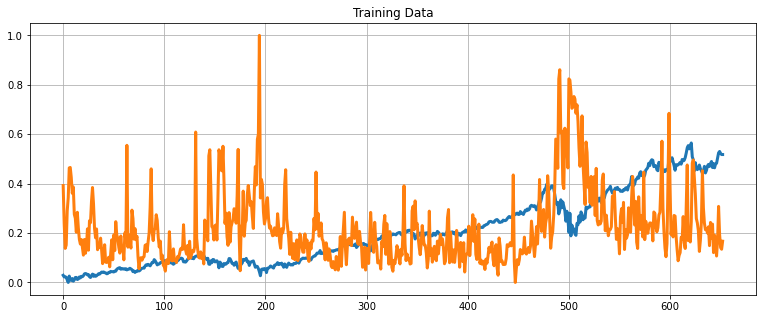

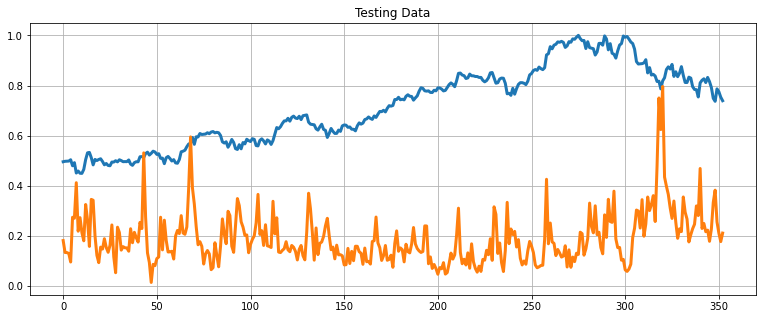

In [322]:
# Define a data plotting function
def show_plot(data, title):
    plt.figure(figsize = (13, 5))
    plt.plot(data, linewidth = 3)
    plt.title(title)
    plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


In [323]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [324]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9318866665339596


In [325]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.04326418],
       [0.03593371],
       [0.03607773],
       ...,
       [0.73605502],
       [0.71575056],
       [0.70280426]])

In [326]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
    Predicted.append(i[0])

In [327]:
len(Predicted)

1006

In [328]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
    close.append(i[0])

In [329]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

Date
0    2018-03-16
1    2018-03-19
2    2018-03-20
3    2018-03-21
4    2018-03-22
...         ...
1001 2022-03-08
1002 2022-03-09
1003 2022-03-10
1004 2022-03-11
1005 2022-03-14

[1006 rows x 1 columns]

In [330]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

Date     Close
0    2018-03-16  0.028992
1    2018-03-19  0.022311
2    2018-03-20  0.023249
3    2018-03-21  0.020709
4    2018-03-22  0.010198
...         ...       ...
1001 2022-03-08  0.737194
1002 2022-03-09  0.786621
1003 2022-03-10  0.775251
1004 2022-03-11  0.753683
1005 2022-03-14  0.739499

[1006 rows x 2 columns]

In [331]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

Date     Close  Prediction
0    2018-03-16  0.028992    0.043264
1    2018-03-19  0.022311    0.035934
2    2018-03-20  0.023249    0.036078
3    2018-03-21  0.020709    0.033814
4    2018-03-22  0.010198    0.025041
...         ...       ...         ...
1001 2022-03-08  0.737194    0.701901
1002 2022-03-09  0.786621    0.746955
1003 2022-03-10  0.775251    0.736055
1004 2022-03-11  0.753683    0.715751
1005 2022-03-14  0.739499    0.702804

[1006 rows x 3 columns]

In [308]:
# Plot the results
create_plot(df_predicted, "Original Vs. Prediction")

In [309]:
def generate_prediction(price_df, vol_df, name):
    # Get individual stock prices and volumes for the given stock
    price_volume_df = each_ticker(stock_price_df, stock_vol_df, name)
    price_volume_target_df = trading_window(price_volume_df)
    
    # Remove the last row as it will be a null value
    price_volume_target_df = price_volume_target_df[:-1]
    
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))
    
    # Creating Feature and Target
    X = price_volume_target_scaled_df[:,:2]
    y = price_volume_target_scaled_df[:,2:]
    
    # Spliting the data this way, since order is important in time-series
    # Note that we did not use train test split with it's default settings since it shuffles the data
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    
    # Define a data plotting function
    def show_plot(data, name, title):
        plt.figure(figsize = (13, 5))
        plt.plot(data, linewidth = 3)
        title = name + title
        plt.title(title)
        plt.grid()

    show_plot(X_train, name, ': Training Data')
    show_plot(X_test, name, ': Testing Data')
    
    from sklearn.linear_model import Ridge
    # Note that Ridge regression performs linear least squares with L2 regularization.
    # Create and train the Ridge Linear Regression  Model
    regression_model = Ridge()
    regression_model.fit(X_train, y_train)
    
    # Test the model and calculate its accuracy 
    lr_accuracy = regression_model.score(X_test, y_test)
    print("Linear Regression Score: ", lr_accuracy)
    
    # Make Prediction
    predicted_prices = regression_model.predict(X)
    predicted_prices

    # Append the predicted values into a list
    Predicted = []
    for i in predicted_prices:
        Predicted.append(i[0])
        
    # Append the close values to the list
    close = []
    for i in price_volume_target_scaled_df:
        close.append(i[0])
        
    # Create a dataframe based on the dates in the individual stock data
    df_predicted = price_volume_target_df[['Date']]
    
    # Add the close values to the dataframe
    df_predicted['Close'] = close

    # Add the predicted values to the dataframe
    df_predicted['Prediction'] = Predicted
    
    # Plot the results
    create_plot(df_predicted, "Original Vs. Prediction", name)
    


Linear Regression Score:  0.9857440631189586


Linear Regression Score:  0.662542018872996


Linear Regression Score:  0.7771430773391049


Linear Regression Score:  0.9880968994116734


Linear Regression Score:  0.7654245291440184


Linear Regression Score:  0.9409661545024238


Linear Regression Score:  0.941597887625248


Linear Regression Score:  0.7058573437042999


Linear Regression Score:  0.8870379065888375


Linear Regression Score:  0.9062926867980723


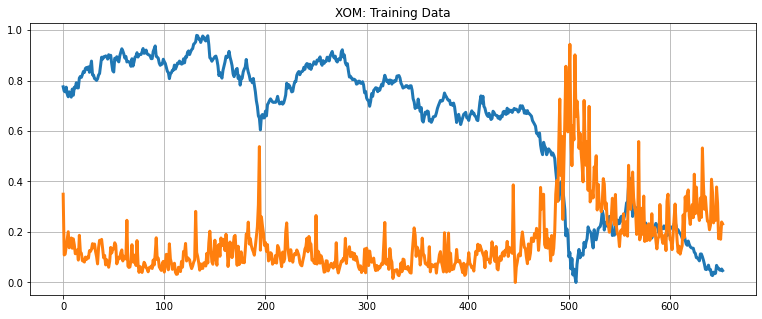

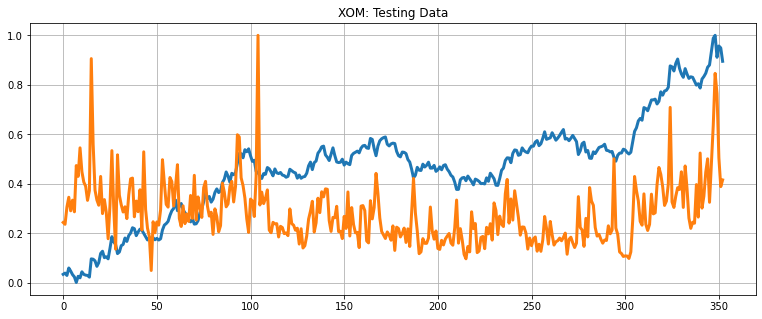

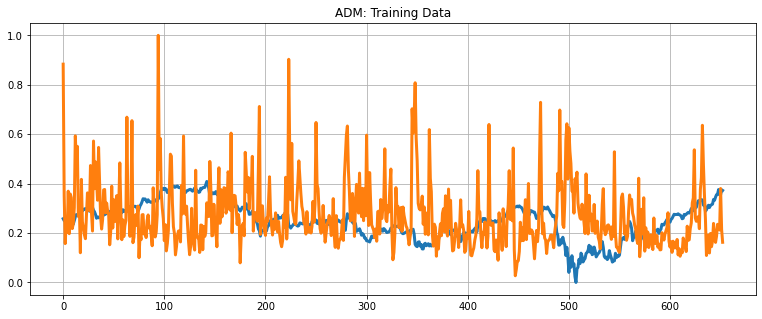

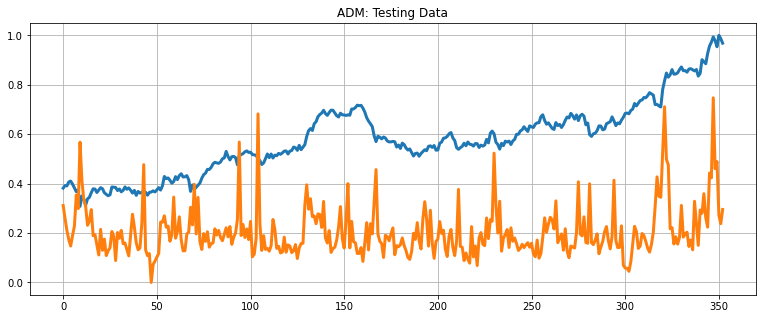

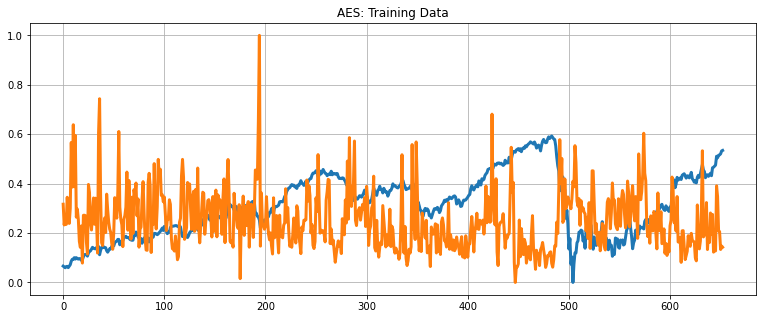

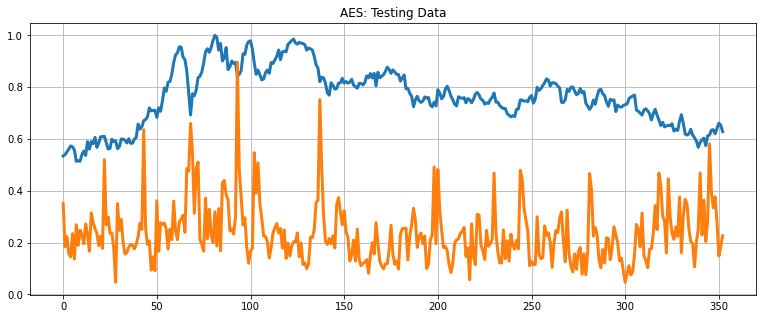

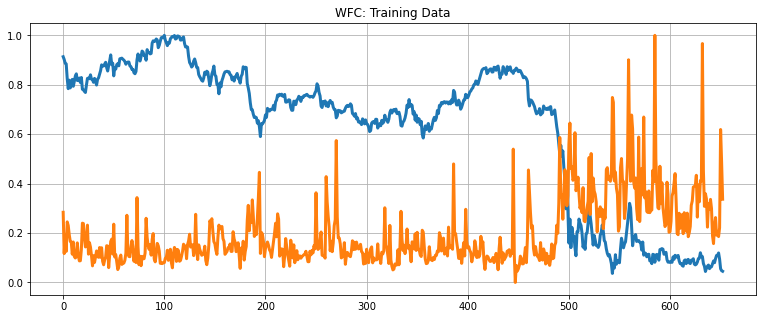

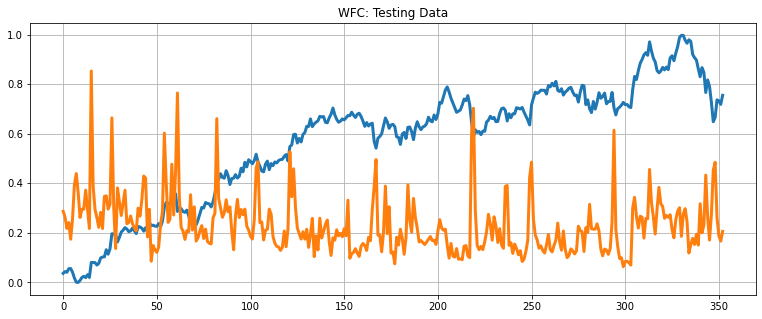

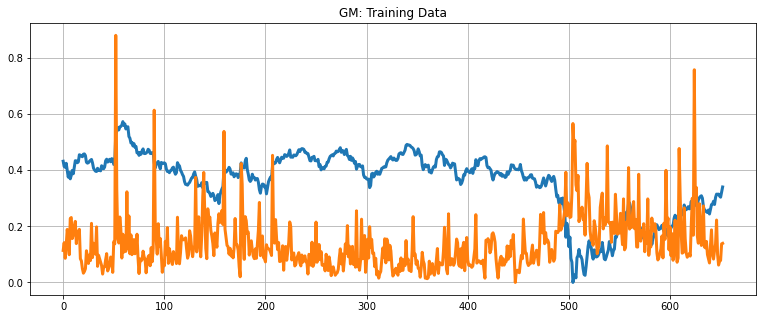

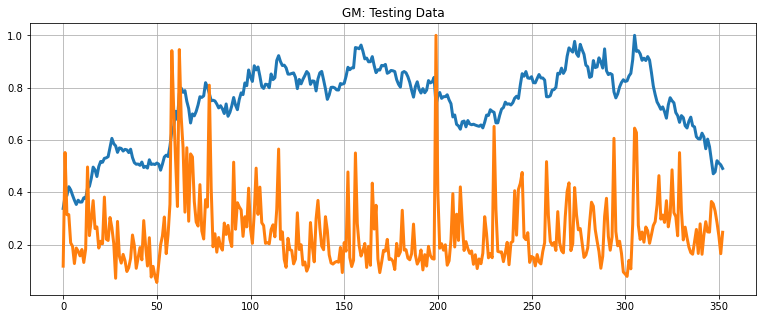

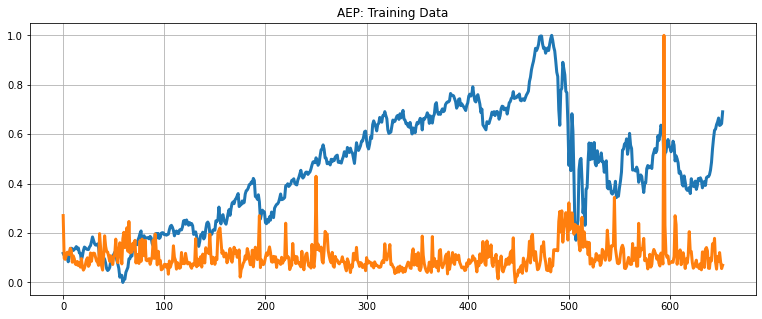

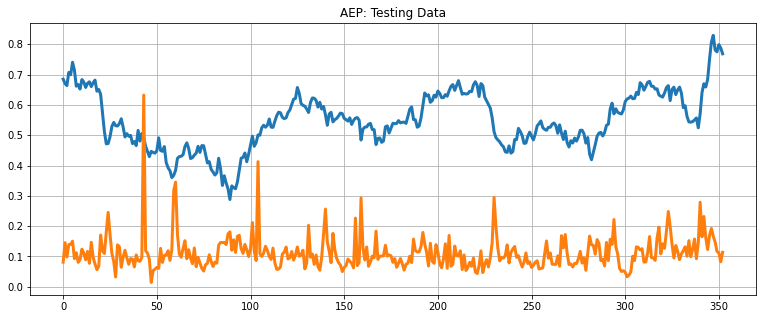

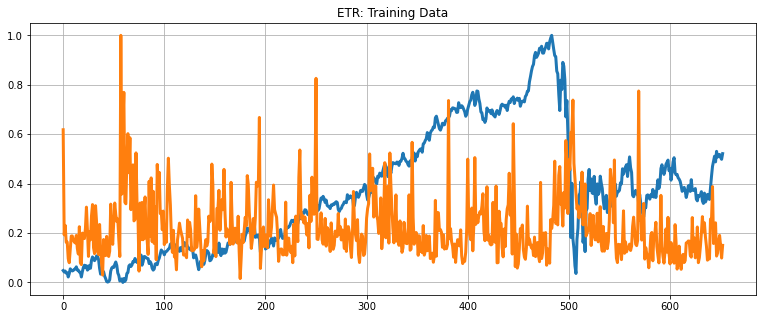

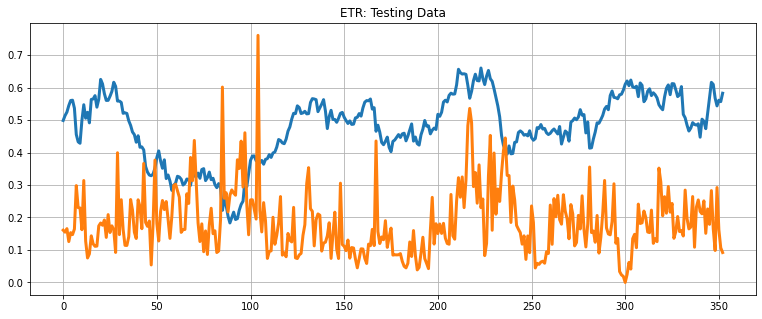

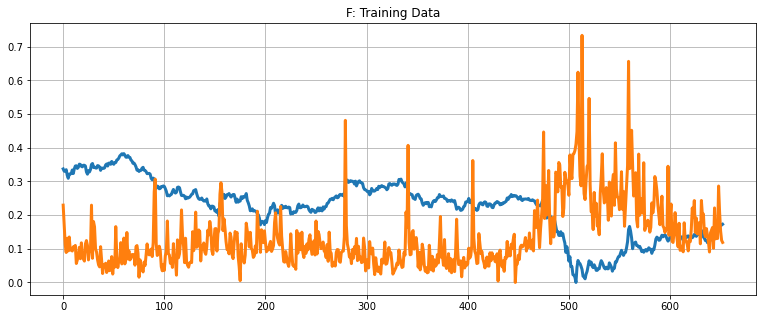

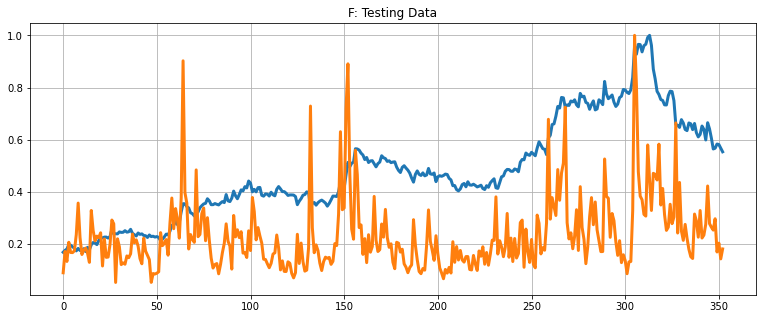

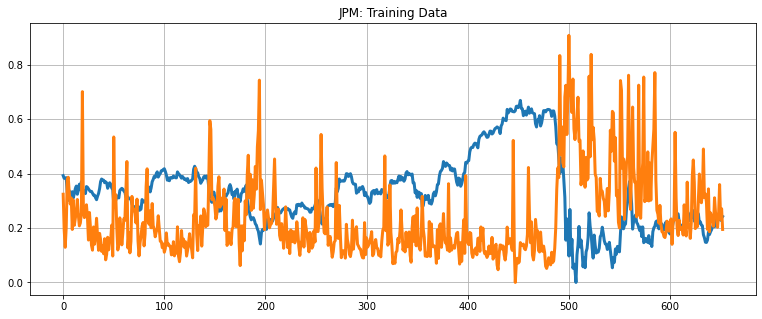

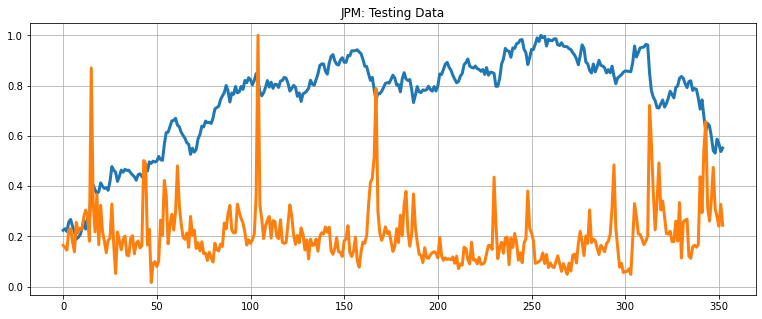

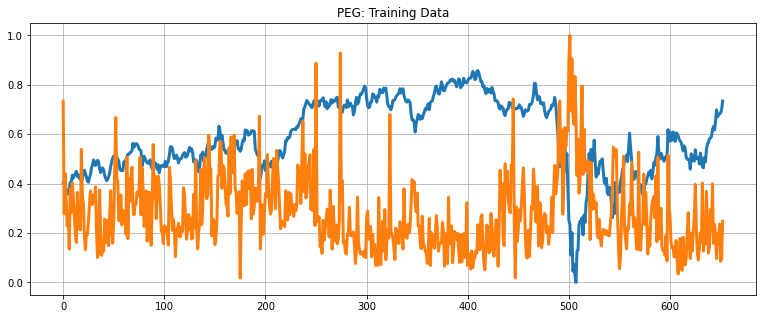

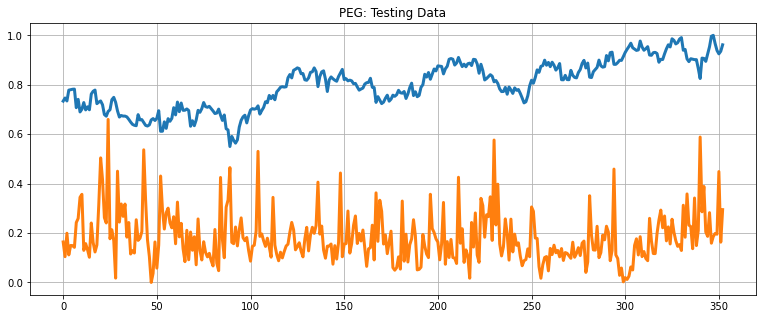

In [310]:
for ticker in top_esg['TICKER']:
    generate_prediction(stock_price_df, stock_vol_df, ticker)